# Yfinance Analyst Report test

### Import library

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

# Set some plot styles
sns.set_style('darkgrid')

from pydantic_ai import Agent
from pydantic_ai.models.groq import GroqModel
from pydantic import BaseModel
import yfinance as yf
import gradio as gr
from dotenv import load_dotenv
import os
import nest_asyncio
import pandas as pd
import math
from typing import Any, Dict



c:\Users\York Yong\.conda\envs\pydanticai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1. Executive Summary

Use LLM to generate

Here you would write a brief summary of the stock, its current price, recommended action, and the main reasons in plain text.

Example (Markdown):

Executive Summary:

- Ticker: AAPL
- Current Price: (Code below will output current price)
- Recommendation: Buy/Hold/Sell
- Target Price: $X.XX
- Rationale: Brief explanation why.

In [2]:
ticker = "AAPL"
stock = yf.Ticker(ticker)
info = stock.info

In [3]:
current_price = stock.history(period="1d")['Close'].iloc[-1]
print(f"Current Price: ${current_price:.2f}")


Current Price: $248.13


In [4]:
stock.analyst_price_targets


{'current': 248.13,
 'low': 184.0,
 'high': 300.0,
 'mean': 245.78214,
 'median': 250.0}

In [28]:
stock.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,8,24,12,1,2
1,-1m,8,24,12,1,2
2,-2m,8,23,12,1,2
3,-3m,8,24,12,0,2


### 2. Company Overview

In [5]:
info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [44]:
info.get('sectorKey', 'N/A')

'technology'

In [6]:
# Print some basic info from yfinance
print("Company Name:", info.get('longName', 'N/A'))
print("Sector:", info.get('sector', 'N/A'))
print("Industry:", info.get('industry', 'N/A'))
print("Website:", info.get('website', 'N/A'))
print("Business Summary:\n", info.get('longBusinessSummary', 'N/A'))


Company Name: Apple Inc.
Sector: Technology
Industry: Consumer Electronics
Website: https://www.apple.com
Business Summary:
 Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts, as well as advertising services include third-party licensing arrangements and its own advertising platforms. In addition, the company offers various subscription-based services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness servic

In [7]:
isin = stock.isin
print(f"ISIN: {isin}")


ISIN: US0378331005


In [8]:
business_summary = info.get('longBusinessSummary', 'N/A')
print(f"Business Summary: {business_summary}")


Business Summary: Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts, as well as advertising services include third-party licensing arrangements and its own advertising platforms. In addition, the company offers various subscription-based services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News

### 3. Industry and Market Analysis

In [9]:
sector = info.get('sector', 'N/A')
industry = info.get('industry', 'N/A')
print(f"Sector: {sector}")
print(f"Industry: {industry}")


Sector: Technology
Industry: Consumer Electronics


In [10]:
sector

'Technology'

In [11]:
tech = yf.Sector('technology')
tech.top_companies

,name,rating,market weight
symbol,,,
AAPL,Apple Inc.,Buy,0.189860
MSFT,Microsoft Corporation,Buy,0.168366
NVDA,NVIDIA Corporation,Buy,0.166282
AVGO,Broadcom Inc.,Buy,0.053212
ORCL,Oracle Corporation,Buy,0.024327
CRM,"Salesforce, Inc.",Buy,0.017167
CSCO,"Cisco Systems, Inc.",Buy,0.011821
NOW,"ServiceNow, Inc.",Buy,0.011711
ACN,Accenture plc,Buy,0.011347


<div class = "alert alert-block alert-danger">

Check how to use sector from yfinance to directly get for ticker and pass it to next cell for competitor check.

In [59]:
sectorKey = info.get('sectorKey', 'N/A')
sectorKey

'technology'

In [60]:
sector = yf.Sector(sectorKey)

In [64]:
sector.overview

{'companies_count': 807,
 'market_cap': 20119671537664,
 'message_board_id': 'INDEXYH311',
 'description': 'Companies engaged in the design, development, and support of computer operating systems and applications. This sector also includes companies that make computer equipment, data storage products, networking products, semiconductors, and components. Companies in this sector include Apple, Microsoft, and IBM.',
 'industries_count': 12,
 'market_weight': 0.29284436,
 'employee_count': 7212421}

In [70]:
sector.top_companies[:10]

,name,rating,market weight
symbol,,,
AAPL,Apple Inc.,Buy,0.189860
MSFT,Microsoft Corporation,Buy,0.168366
NVDA,NVIDIA Corporation,Buy,0.166282
AVGO,Broadcom Inc.,Buy,0.053212
ORCL,Oracle Corporation,Buy,0.024327
CRM,"Salesforce, Inc.",Buy,0.017167
CSCO,"Cisco Systems, Inc.",Buy,0.011821
NOW,"ServiceNow, Inc.",Buy,0.011711
ACN,Accenture plc,Buy,0.011347


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


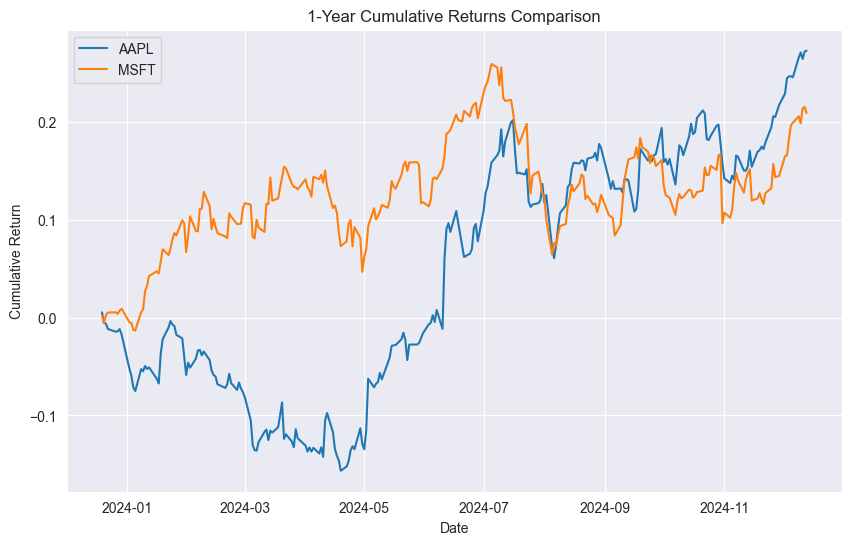

In [12]:
# Compare AAPL to another tech stock (e.g., MSFT) in terms of returns over the last year
competitor = "MSFT"

start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

data_aapl = yf.download(ticker, start=start_date, end=end_date)
data_msft = yf.download(competitor, start=start_date, end=end_date)

# Calculate returns
data_aapl['Returns'] = data_aapl['Adj Close'].pct_change()
data_msft['Returns'] = data_msft['Adj Close'].pct_change()

cumulative_aapl = (1 + data_aapl['Returns']).cumprod() - 1
cumulative_msft = (1 + data_msft['Returns']).cumprod() - 1

plt.figure(figsize=(10,6))
plt.plot(cumulative_aapl.index, cumulative_aapl, label="AAPL")
plt.plot(cumulative_msft.index, cumulative_msft, label="MSFT")
plt.title("1-Year Cumulative Returns Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()


### 4. Investment Thesis

Markdown Cell:
Here you write out the main reasons for your recommendation, focusing on Apple’s revenue growth drivers, brand strength, ecosystem, etc.

No code needed here, just explanatory text.

In [13]:
# Summarize recent analyst recommendations

stock.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,8,24,12,1,2
1,-1m,8,24,12,1,2
2,-2m,8,23,12,1,2
3,-3m,8,24,12,0,2


### 5. Financial Analysis

In [14]:
# Basic Valuation Metrics using current price and fundamentals
# Note: yfinance info dictionary may provide P/E and other metrics directly
current_price = stock.history(period="1d")['Close'].iloc[-1]
pe_ratio = info.get('trailingPE', None)
forward_pe = info.get('forwardPE', None)
market_cap = info.get('marketCap', None)

print("Current Price:", current_price)
print("Market Cap:", market_cap)
print("Trailing PE:", pe_ratio)
print("Forward PE:", forward_pe)


Current Price: 248.1300048828125
Market Cap: 3750683475968
Trailing PE: 40.810856
Forward PE: 29.851196


In [15]:
financials = stock.financials
quarterly_financials = stock.quarterly_financials
balance_sheet = stock.balance_sheet
cash_flow = stock.cashflow

print("Annual Financials:")
display(financials)

print("Quarterly Financials:")
display(quarterly_financials)


Annual Financials:


,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,NaN
Tax Rate For Calcs,0.240912,0.147192,0.162,0.133,NaN
Normalized EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,93736000000.0,96995000000.0,99803000000.0,94680000000.0,NaN
Reconciled Depreciation,11445000000.0,11519000000.0,11104000000.0,11284000000.0,NaN
Reconciled Cost Of Revenue,210352000000.0,214137000000.0,223546000000.0,212981000000.0,NaN
EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
EBIT,123216000000.0,114301000000.0,119437000000.0,111852000000.0,NaN
Net Interest Income,NaN,-183000000.0,-106000000.0,198000000.0,890000000.0
Interest Expense,NaN,3933000000.0,2931000000.0,2645000000.0,2873000000.0


Quarterly Financials:


,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Tax Rate For Calcs,0.21,0.159,0.158,0.159,0.149715,NaN,NaN
Normalized EBITDA,32502000000.0,28202000000.0,30736000000.0,43221000000.0,30653000000.0,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,14736000000.0,21448000000.0,23636000000.0,33916000000.0,22956000000.0,NaN,NaN
Reconciled Depreciation,2911000000.0,2850000000.0,2836000000.0,2848000000.0,2653000000.0,NaN,NaN
Reconciled Cost Of Revenue,51051000000.0,46099000000.0,48482000000.0,64720000000.0,49071000000.0,NaN,NaN
EBITDA,32502000000.0,28202000000.0,30736000000.0,43221000000.0,30653000000.0,NaN,NaN
EBIT,29591000000.0,25352000000.0,27900000000.0,40373000000.0,28000000000.0,NaN,NaN
Net Interest Income,NaN,NaN,NaN,NaN,-18000000.0,-18000000.0,-12000000.0
Interest Expense,NaN,NaN,NaN,NaN,1002000000.0,998000000.0,930000000.0


In [16]:
stock.income_stmt

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,NaN
Tax Rate For Calcs,0.240912,0.147192,0.162,0.133,NaN
Normalized EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,93736000000.0,96995000000.0,99803000000.0,94680000000.0,NaN
Reconciled Depreciation,11445000000.0,11519000000.0,11104000000.0,11284000000.0,NaN
Reconciled Cost Of Revenue,210352000000.0,214137000000.0,223546000000.0,212981000000.0,NaN
EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
EBIT,123216000000.0,114301000000.0,119437000000.0,111852000000.0,NaN
Net Interest Income,NaN,-183000000.0,-106000000.0,198000000.0,890000000.0
Interest Expense,NaN,3933000000.0,2931000000.0,2645000000.0,2873000000.0


In [17]:
stock.balance_sheet

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Treasury Shares Number,NaN,0.0,NaN,NaN,NaN
Ordinary Shares Number,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
Share Issued,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
Net Debt,76686000000.0,81123000000.0,96423000000.0,89779000000.0,NaN
Total Debt,106629000000.0,111088000000.0,132480000000.0,136522000000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,65171000000.0,61555000000.0,48304000000.0,62639000000.0,NaN
Other Short Term Investments,35228000000.0,31590000000.0,24658000000.0,27699000000.0,NaN
Cash And Cash Equivalents,29943000000.0,29965000000.0,23646000000.0,34940000000.0,NaN
Cash Equivalents,2744000000.0,1606000000.0,5100000000.0,17635000000.0,NaN


In [18]:
stock.cashflow

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Free Cash Flow,108807000000.0,99584000000.0,111443000000.0,92953000000.0,NaN
Repurchase Of Capital Stock,-94949000000.0,-77550000000.0,-89402000000.0,-85971000000.0,NaN
Repayment Of Debt,-9958000000.0,-11151000000.0,-9543000000.0,-8750000000.0,NaN
Issuance Of Debt,0.0,5228000000.0,5465000000.0,20393000000.0,NaN
Issuance Of Capital Stock,NaN,NaN,NaN,1105000000.0,880000000.0
Capital Expenditure,-9447000000.0,-10959000000.0,-10708000000.0,-11085000000.0,NaN
Interest Paid Supplemental Data,NaN,3803000000.0,2865000000.0,2687000000.0,3002000000.0
Income Tax Paid Supplemental Data,26102000000.0,18679000000.0,19573000000.0,25385000000.0,NaN
End Cash Position,29943000000.0,30737000000.0,24977000000.0,35929000000.0,NaN
Beginning Cash Position,30737000000.0,24977000000.0,35929000000.0,39789000000.0,NaN


### 6. Risk and Concerns

Markdown Cell:
List the risks discovered: supply chain issues, regulatory environment, reliance on iPhone sales, competitive pressure, etc.

No code needed here.

In [19]:
# Extracting the relatedControversy cell
if 'relatedControversy' in stock.sustainability.index:
    related_controversy = stock.sustainability.loc['relatedControversy'].values[0]
    print("Related Controversy:")
    print(related_controversy)
else:
    print("The 'relatedControversy' field is not available in the sustainability data.")


Related Controversy:
['Customer Incidents;Social Supply Chain Incidents;Business Ethics Incidents']


### 7. Catalysts

Markdown Cell:
Upcoming product launches, quarterly earnings reports, new market expansions, etc.

No code needed here.

In [20]:
stock.earnings_estimate

,numberOfAnalysts,avg,low,high,yearAgoEps,growth
0q,26,2.35171,2.1900,2.50000,2.18000,0.0788
+1q,26,1.67938,1.5100,1.82000,1.53000,0.0976
0y,39,7.38959,6.7100,7.85000,6.08000,0.2154
+1y,36,8.27362,7.3927,9.35313,7.38959,0.1196


In [21]:
stock.revenue_estimate

,numberOfAnalysts,avg,low,high,yearAgoRevenue,growth
0q,27,124410526290,119563000000,129887000000,119575000000,0.0404
+1q,27,96489437590,88552000000,101569674900,90753000000,0.0632
0y,39,414426950870,391175000000,431783000000,391035000000,0.0598
+1y,39,448279338750,417777122640,479000000000,414426950870,0.0817


In [22]:
stock.earnings_history

,epsEstimate,epsActual,epsDifference,surprisePercent
2023-12-31,2.10534,2.18,0.07,0.0355
2024-03-31,1.49923,1.53,0.03,0.0205
2024-06-30,1.34086,1.40,0.06,0.0441
2024-09-30,0.94654,0.97,0.02,0.0248


In [23]:
stock.news

[{'uuid': '9285d1b1-5ddf-3589-860a-3f0be8c7d8b7',
  'title': 'Meet the 3 Supercharged Growth Stocks Poised to Hit $4 Trillion by 2025, According to a Certain Wall Street Analyst',
  'publisher': 'Motley Fool',
  'link': 'https://finance.yahoo.com/m/9285d1b1-5ddf-3589-860a-3f0be8c7d8b7/meet-the-3-supercharged.html',
  'providerPublishTime': 1734257100,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/ZJ57pD5405Z5spr7XbSOOA--~B/aD05MzI7dz0xNDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/motleyfool.com/223f93d9c79c1e0bae89faea03fe1256',
     'width': 1400,
     'height': 932,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/2GGj9hn45M0KcVtQlhqtDw--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/motleyfool.com/223f93d9c79c1e0bae89faea03fe1256',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['NVDA', 'AAPL', 'MSFT']},
 {'uuid': '88269518-0329-3

In [24]:
def summarize_news(news_list):
    """
    Summarize the top news and provide links in point form.
    
    Parameters:
        news_list (list): A list of news articles where each article is a dictionary with 'title' and 'link' keys.
    
    Returns:
        str: A formatted string of news summaries with links in markdown format.
    """
    if not news_list or len(news_list) == 0:
        return "No news available."
    
    summaries = []
    for article in news_list[:5]:  # Get top 5 articles
        title = article.get('title', 'No Title')
        link = article.get('link', '#')
        summaries.append(f"- [{title}]({link})")
    
    return "\n".join(summaries)


In [26]:
    # Summarize top news
    news_summaries = summarize_news(stock.news)

In [27]:
news_summaries

'- [Meet the 3 Supercharged Growth Stocks Poised to Hit $4 Trillion by 2025, According to a Certain Wall Street Analyst](https://finance.yahoo.com/m/9285d1b1-5ddf-3589-860a-3f0be8c7d8b7/meet-the-3-supercharged.html)\n- [Major Apple chip supplier is expanding into the U.S.](https://finance.yahoo.com/m/88269518-0329-3039-b451-c82044bde383/major-apple-chip-supplier-is.html)\n- [Apple’s Tim Cook Dined with Trump](https://finance.yahoo.com/m/f2f61f15-a346-3cb8-9112-1c4c61db5e67/apple%E2%80%99s-tim-cook-dined-with.html)\n- [1 Unstoppable Stock That Could Join Nvidia, Apple, Microsoft, Amazon, Alphabet, Meta, and Tesla in the $1 Trillion Club](https://finance.yahoo.com/m/6565f7bc-0530-358d-8f7f-cd6142742238/1-unstoppable-stock-that.html)\n- [Sorry, Mad Men. The Ad Revolution Is Here.](https://finance.yahoo.com/m/f5b08760-635c-3cae-91fa-0f8dd94a7dfd/sorry%2C-mad-men.-the-ad.html)'

### 8. Technical Analysis

[*********************100%***********************]  1 of 1 completed


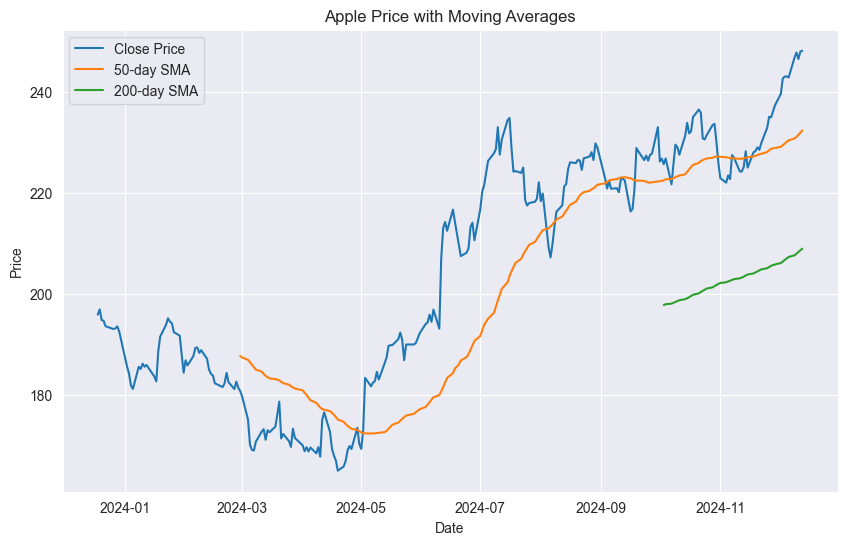

In [25]:
# Simple Moving Averages
data = yf.download(ticker, start=(datetime.now()-timedelta(days=365)).strftime('%Y-%m-%d'), end=datetime.now().strftime('%Y-%m-%d'))
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['SMA50'], label='50-day SMA')
plt.plot(data.index, data['SMA200'], label='200-day SMA')
plt.title("Apple Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


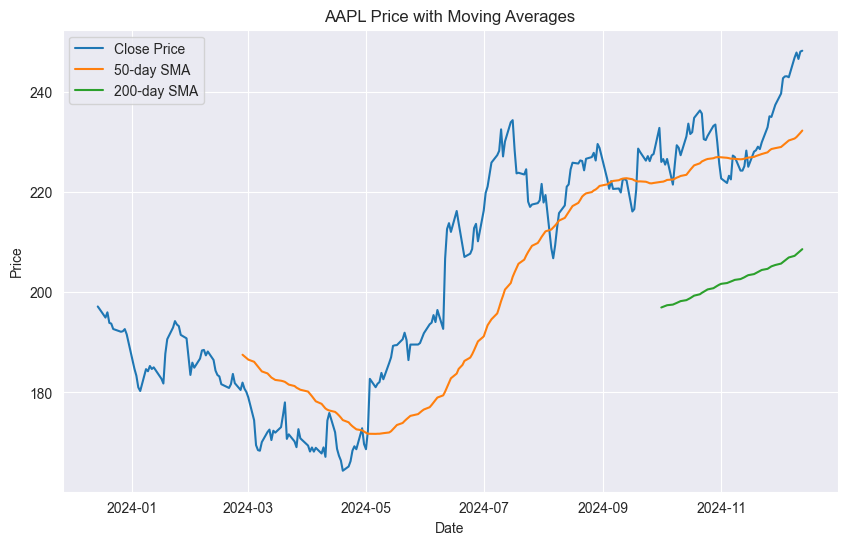

In [26]:
data = stock.history(period="1y")
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['SMA50'], label='50-day SMA')
plt.plot(data.index, data['SMA200'], label='200-day SMA')
plt.title(f"{ticker} Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


### 9. ESG Analysis

Markdown Cell:
Discuss ESG ratings from external sources. yfinance does not provide ESG data directly.

No code needed or possible with just yfinance here. Would need external data.

In [27]:
stock.sustainability

,esgScores
maxAge,86400
totalEsg,16.79
environmentScore,0.55
socialScore,7.52
governanceScore,8.72
ratingYear,2024
ratingMonth,12
highestControversy,3.0
peerCount,237
esgPerformance,LAG_PERF


### 10. Recommendations

Summarize your final recommendation (Buy/Hold/Sell) and give your price target along with the logic behind it.

In [28]:
stock.recommendations_summary

,period,strongBuy,buy,hold,sell,strongSell
0,0m,8,24,12,1,2
1,-1m,8,24,12,1,2
2,-2m,8,23,12,1,2
3,-3m,8,24,12,0,2


### 11. Appendices & Disclosures 

Include data tables, charts, disclaimers, and disclosure of conflicts of interest.

In [29]:
stock.insider_transactions

,Shares,Value,URL,Text,Insider,Position,Transaction,Start Date,Ownership
0,200000,45464500.0,,Sale at price 224.68 - 229.28 per share.,LEVINSON ARTHUR D,Director,,2024-11-19,D
1,4130,945233.0,,Sale at price 228.87 per share.,KONDO CHRISTOPHER,Officer,,2024-11-18,D
2,8000,0.0,,Stock Gift at price 0.00 per share.,ADAMS KATHERINE L,General Counsel,,2024-11-05,D
3,8115,NaN,,,KONDO CHRISTOPHER,Officer,,2024-10-15,D
4,59305,13433769.0,,Sale at price 226.52 per share.,MAESTRI LUCA,Chief Financial Officer,,2024-10-04,D
...,...,...,...,...,...,...,...,...,...
80,1685,NaN,,,LEVINSON ARTHUR D,Director,,2023-02-01,D
81,1685,NaN,,,SUGAR RONALD D,Director,,2023-02-01,D
82,1685,NaN,,,BELL JAMES A,Director,,2023-02-01,D
83,1685,NaN,,,LOZANO MONICA C.,Director,,2023-02-01,D


In [30]:
def extract_key_metrics(info: Dict[str, Any]) -> Dict[str, str]:
    """Extract key financial metrics from the info dictionary and format them."""
    metrics = {
        "Trailing P/E": format_number(info.get("trailingPE", float('nan'))),
        "Forward P/E": format_number(info.get("forwardPE", float('nan'))),
        "Profit Margins": format_number(info.get("profitMargins", float('nan'))),
        "Return on Equity": format_number(info.get("returnOnEquity", float('nan'))),
        "EBITDA": format_number(info.get("ebitda", float('nan'))),
        "Free Cash Flow": format_number(info.get("freeCashflow", float('nan')))
    }
    return metrics

In [31]:
def format_number(x: Any) -> str:
    if isinstance(x, (int, float)) and not math.isnan(x):
        return f"{x:,.2f}"
    return str(x)

In [32]:
extract_key_metrics(info)

{'Trailing P/E': '40.81',
 'Forward P/E': '29.85',
 'Profit Margins': '0.24',
 'Return on Equity': '1.57',
 'EBITDA': '134,660,997,120.00',
 'Free Cash Flow': '110,846,001,152.00'}